<a href="https://colab.research.google.com/github/ichsanup/Machine_Learning-Heart_Disease/blob/main/SKRIPSI_HEART_DISEASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install Kaggle
!pip install -q Kaggle

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ichsanustaf18","key":"d876b5ebb678fefb0ec03e07ce07ffcd"}'}

In [ ]:
#create kaggle folder
! mkdir ~/.kaggle

In [ ]:
!ls

kaggle.json  sample_data


In [ ]:
#copy kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 /root/.kaggle/kaggle.json

In [ ]:
#Download Dataset
!kaggle datasets download -d yasserh/heart-disease-dataset

  0% 0.00/3.40k [00:00<?, ?B/s]
100% 3.40k/3.40k [00:00<00:00, 4.01MB/s]


In [ ]:
ls

heart-disease-dataset.zip  kaggle.json  sample_data/


In [ ]:
#Make Dir
!mkdir data

In [ ]:
#Ekstrak Dataset
! unzip heart-disease-dataset.zip -d data/

Archive:  heart-disease-dataset.zip
  inflating: data/heart.csv          


In [ ]:
#Import Library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pickle

In [ ]:
#Read Dataset
df = pd.read_csv('/content/data/heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
print('Dataset ini terdiri dari {0} baris dan {1} kolom'.format(df.shape[0], df.shape[1]))

Dataset ini terdiri dari 303 baris dan 14 kolom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#checking null value
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

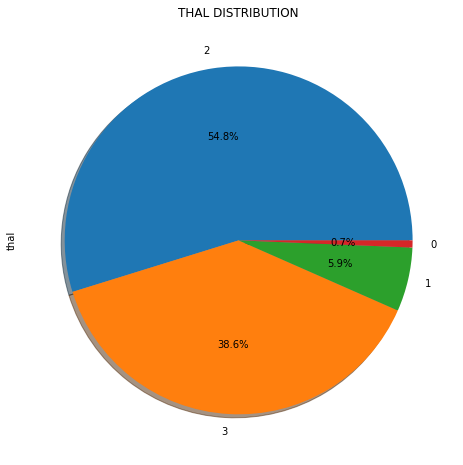

In [ ]:
plt.title('THAL DISTRIBUTION')
#sns.countplot(x="thal", data=df, palette="bwr")
#plt.show()
df['thal'].value_counts().plot(kind="pie", autopct='%.1f%%', figsize=(8,8),shadow=True)

In [ ]:
df.fbs.value_counts()

0    258
1     45
Name: fbs, dtype: int64

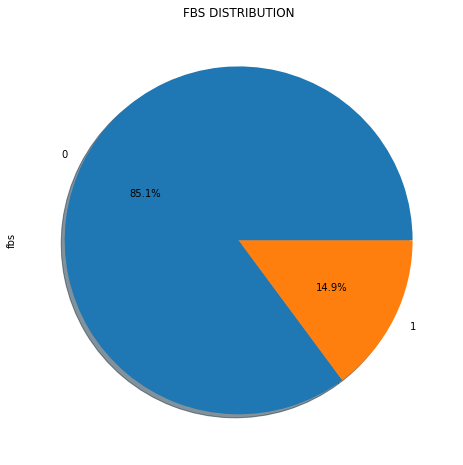

In [ ]:
plt.title('FBS DISTRIBUTION')
#sns.countplot(x="fbs", data=df, palette="bwr")
#plt.show()
df['fbs'].value_counts().plot(kind="pie", autopct='%.1f%%', figsize=(8,8),shadow=True)

In [ ]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

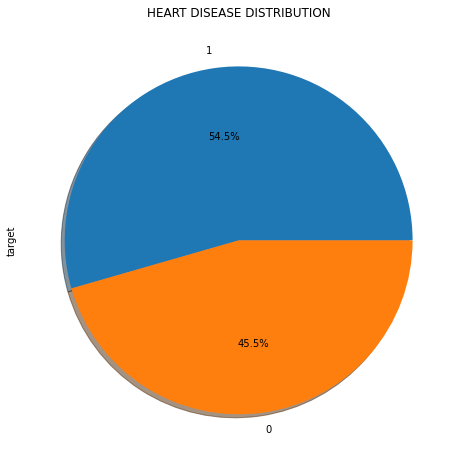

In [ ]:
plt.title('HEART DISEASE DISTRIBUTION')
df['target'].value_counts().plot(kind="pie", autopct='%.1f%%', figsize=(8,8),shadow=True)

In [ ]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [ ]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
countNoDisease = len(df[df.sex == 0])
countHaveDisease = len(df[df.sex == 1])
print("Patient Female: {:.2f}%".format((countNoDisease / (len(df.sex))*100)))
print("Patient Male: {:.2f}%".format((countHaveDisease / (len(df.sex))*100)))

Patient Female: 31.68%
Patient Male: 68.32%


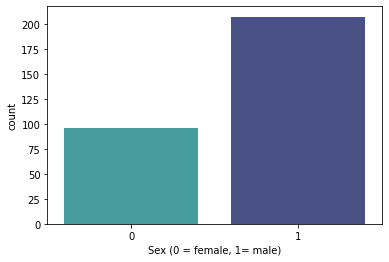

In [ ]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

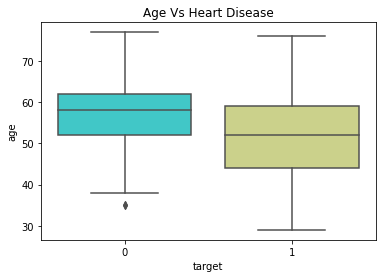

In [ ]:
plt.title('Age Vs Heart Disease')
sns.boxplot(x='target', y='age', data=df,palette='rainbow')

In [ ]:
df.groupby(['sex'])['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

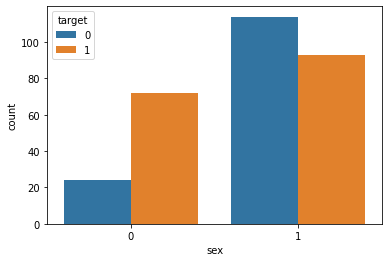

In [ ]:
sns.countplot(x=df['sex'],hue=df['target'])

In [ ]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


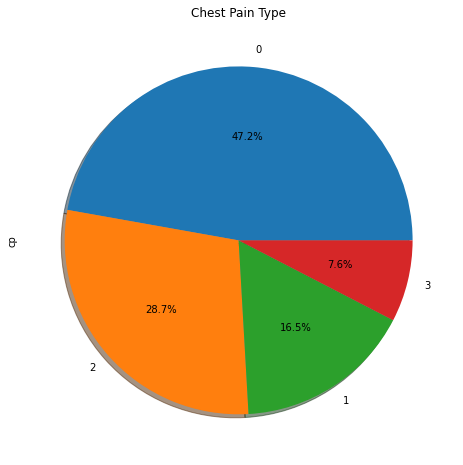

In [ ]:
plt.title("Chest Pain Type")
df['cp'].value_counts().plot(kind="pie", autopct='%.1f%%', figsize=(8,8),shadow=True)

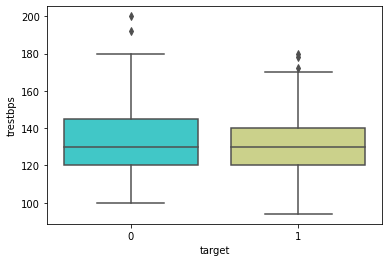

In [ ]:
sns.boxplot(x='target', y='trestbps', data=df,palette='rainbow')

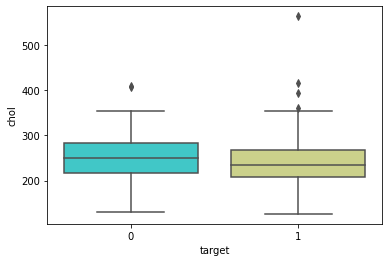

In [ ]:
sns.boxplot(x='target', y='chol', data=df,palette='rainbow')

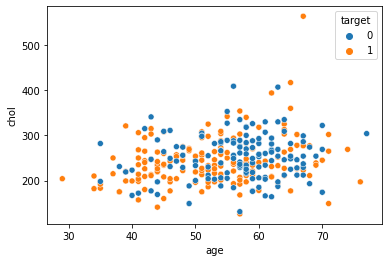

In [ ]:
sns.scatterplot(data=df, x="age", y="chol", hue="target")

In [ ]:
df.groupby(['fbs'])['target'].value_counts()

fbs  target
0    1         142
     0         116
1    1          23
     0          22
Name: target, dtype: int64

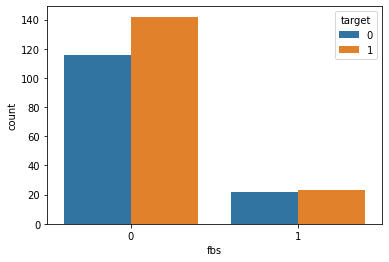

In [ ]:
sns.countplot(x=df['fbs'],hue=df['target'])
plt.show()

In [ ]:
df.groupby(['chol'])['target'].value_counts()

chol  target
126   1         1
131   0         1
141   1         1
149   0         1
      1         1
               ..
394   1         1
407   0         1
409   0         1
417   1         1
564   1         1
Name: target, Length: 201, dtype: int64

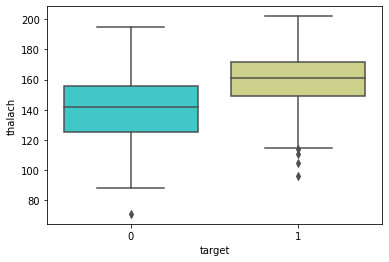

In [ ]:
sns.boxplot(x='target', y='thalach', data=df,palette='rainbow')

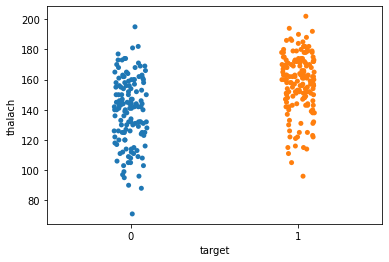

In [ ]:
sns.stripplot(x="target", y="thalach", data=df)

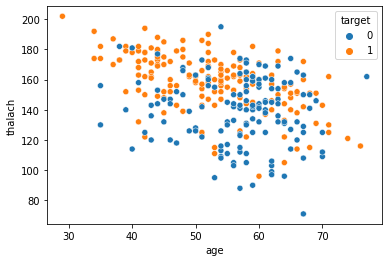

In [ ]:
sns.scatterplot(data=df, x="age", y="thalach", hue="target")

In [ ]:
df.groupby(['exang'])['target'].value_counts()

exang  target
0      1         142
       0          62
1      0          76
       1          23
Name: target, dtype: int64

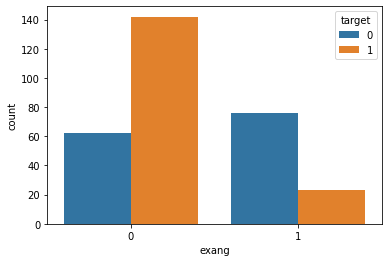

In [ ]:
sns.countplot(x=df['exang'],hue=df['target'])
plt.show()

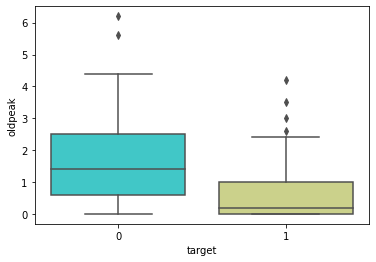

In [ ]:
sns.boxplot(x='target', y='oldpeak', data=df,palette='rainbow')

In [ ]:
df.groupby(['slope'])['target'].value_counts()

slope  target
0      0          12
       1           9
1      0          91
       1          49
2      1         107
       0          35
Name: target, dtype: int64

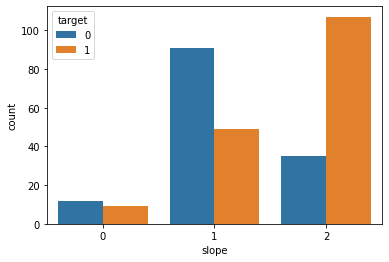

In [ ]:
sns.countplot(x=df['slope'],hue=df['target'])
plt.show()

In [ ]:
df.groupby(['ca'])['target'].value_counts()

ca  target
0   1         130
    0          45
1   0          44
    1          21
2   0          31
    1           7
3   0          17
    1           3
4   1           4
    0           1
Name: target, dtype: int64

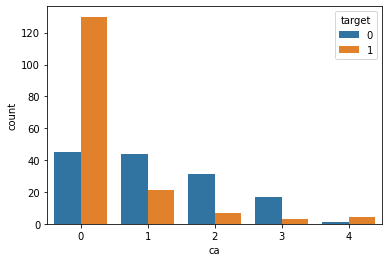

In [ ]:
sns.countplot(x=df['ca'],hue=df['target'])
plt.show()

In [ ]:
df.groupby(['thal'])['target'].value_counts()

thal  target
0     0           1
      1           1
1     0          12
      1           6
2     1         130
      0          36
3     0          89
      1          28
Name: target, dtype: int64

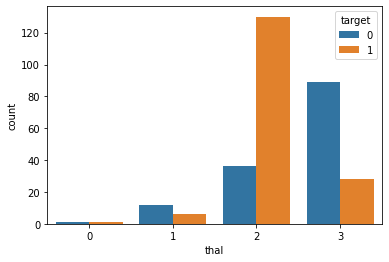

In [ ]:
sns.countplot(x=df['thal'],hue=df['target'])
plt.show()

In [ ]:
#Delete Column Target
X = df.drop(['target'],axis=1)
X.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


In [ ]:
y = df.target

y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
len(y)

303

In [ ]:
len(X)

303

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
model_4 = tree.DecisionTreeClassifier(criterion='entropy')
model_4.fit(X_train, y_train)
dt = model_4.score(X_train, y_train)
dt

1.0

In [ ]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)  # n_neighbors means k
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(X_test, y_test)*100))

2 NN Score: 73.77%


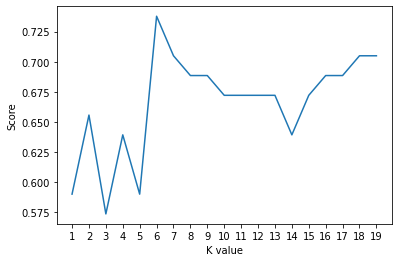

Maximum KNN Score is 73.77%


In [ ]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
accuracies = {}
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))

plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

In [ ]:
knn.fit(X_train, y_train)
print('Training Accuracy:', knn.score(X_train, y_train))
print('Training Accuracy:', knn.score(X_test, y_test))

Training Accuracy: 0.731404958677686
Training Accuracy: 0.7049180327868853


In [ ]:
knn.predict([[56,1,1,120,236,0,1,178,0,0.8,2,0,2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [ ]:
knn.predict([[57,1,0,130,131,0,1,115,1,1.2,1,1,3]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [ ]:
######## Confusion Matrix

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Predicted values

y_head_lr = lr.predict(X_test)
knn3 = KNeighborsClassifier(n_neighbors = 6)
knn3.fit(X_train, y_train)
y_head_knn = knn3.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)

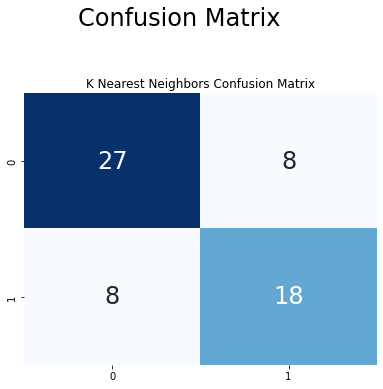

In [ ]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrix",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [ ]:
###################